<a href="https://colab.research.google.com/github/mao1e/Image-Decompression-project/blob/main/linear_algebra_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization stuff

In [ ]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


#make the plots prettier
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
#import MNIST

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import time

x_values = []
y_values = []
z_values = []

In [ ]:


for i in range(484, 485, 1):
    print(i)
    start_time = time.time()
    pca = PCA(n_components = i)
    X_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(X_reduced, y_train)
    y_pred = sgd_clf.predict(X_test_reduced)
    result_accuracy = accuracy_score(y_test, y_pred)
    x_values.append(i)
    y_values.append(result_accuracy)
    end_time = time.time()
    execution_time = end_time - start_time
    z_values.append(execution_time)




484


In [ ]:
new_z_values.append(z_values[-1])


In [ ]:
new_x_values

[2,
 7,
 12,
 17,
 22,
 27,
 32,
 37,
 42,
 47,
 52,
 57,
 62,
 67,
 72,
 77,
 82,
 87,
 92,
 97,
 102,
 107,
 112,
 117,
 122,
 127,
 132,
 137,
 142,
 147,
 152,
 157,
 162,
 167,
 172,
 177,
 182,
 187,
 192,
 197,
 202,
 207,
 212,
 217,
 222,
 227,
 232,
 237,
 242,
 247,
 252,
 257,
 262,
 267,
 272,
 277,
 282,
 287,
 292,
 297,
 302,
 307,
 312,
 317,
 322,
 327,
 332,
 337,
 342,
 347,
 352,
 357,
 362,
 367,
 372,
 377,
 382,
 387,
 392,
 397,
 402,
 407,
 412,
 417,
 422,
 427,
 432,
 437,
 442,
 447,
 452,
 457,
 462,
 467,
 472,
 477,
 482]

<Figure size 600x400 with 0 Axes>

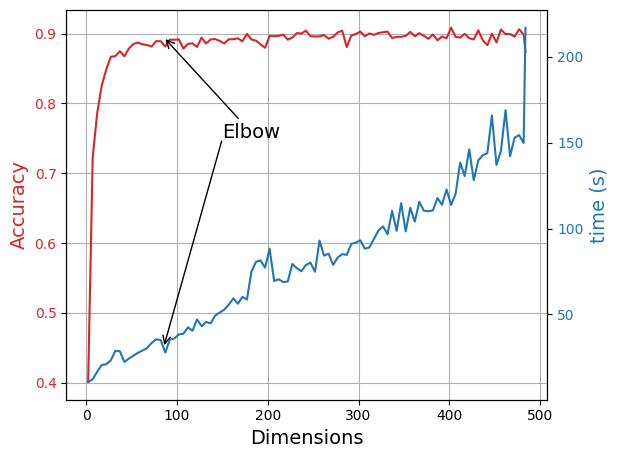

In [ ]:
plt.figure(figsize=(6, 4))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Dimensions")
ax1.set_ylabel("Accuracy", color=color)
plt.grid(True)
ax1.plot(new_x_values, new_y_values, color=color, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  # we already handled the x-label with ax1
ax2.plot(new_x_values, new_z_values, color=color, linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.annotate("Elbow", xy=(85, 0.895), xytext=(150, 0.75),
             arrowprops=dict(arrowstyle="->"))
ax1.annotate("", xy=(85, 0.45), xytext=(150, 0.75),
             arrowprops=dict(arrowstyle="->"))
plt.savefig("second good graph")
plt.show()

In [ ]:
#tester code with pca
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

pca = PCA(n_components = 23)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


rnd_clf = RandomForestClassifier(n_estimators=452, random_state=42)

%time rnd_clf.fit(X_reduced, y_train)

y_pred = rnd_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

CPU times: user 3min 16s, sys: 741 ms, total: 3min 16s
Wall time: 3min 21s


0.9525

In [ ]:
#tester code without pca

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

new_x_values.append(484)
start_time = time.time()
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)
new_y_values.append(accuracy_score(y_test, y_pred))

end_time = time.time()
execution_time = end_time - start_time
z_values.append(execution_time)





In [ ]:
#use this as a sample pca to ML model test
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA(n_components = 100)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_reduced, y_train)

y_pred = sgd_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)




CPU times: user 28.7 s, sys: 144 ms, total: 28.8 s
Wall time: 28.7 s


0.8835

In [ ]:


print(pca.components_[0])

[-6.25278585e-18  8.05687112e-19 -5.24460416e-18  3.27144520e-19
  1.65516632e-18 -9.03756733e-20  1.39938810e-19  2.52303625e-20
 -2.26734354e-20 -1.26507311e-20 -2.40340720e-20 -9.53922034e-21
 -1.13022999e-06 -4.44987008e-06 -2.19785960e-06 -9.15774833e-08
 -2.94985563e-24  3.09330892e-22  3.72499363e-22  7.42305029e-22
 -6.17920651e-22 -2.07028897e-22  4.63872461e-22  4.91046421e-22
 -1.62403759e-22 -8.33652423e-23  1.73280445e-22  4.67986927e-23
 -1.71814134e-23  1.91702430e-23 -3.29633898e-23  3.65474621e-23
  2.46332117e-07  8.70394526e-07  8.07828577e-06  2.07899216e-05
  2.74484785e-05  4.43302473e-05  7.14293298e-05  9.03571728e-05
  8.92534083e-05  7.96187541e-05  8.37900230e-05  6.12003371e-05
  3.32476101e-05  3.18856915e-05  1.84435794e-05 -1.33003534e-05
 -1.08540941e-05  1.55973517e-06  1.06839782e-06  5.04492283e-07
  2.71245813e-25 -3.65834317e-25 -9.77936240e-25  1.70712010e-25
 -6.60389193e-26  1.64756268e-25  1.96615753e-06  1.09264414e-06
  3.78170707e-06  5.42556

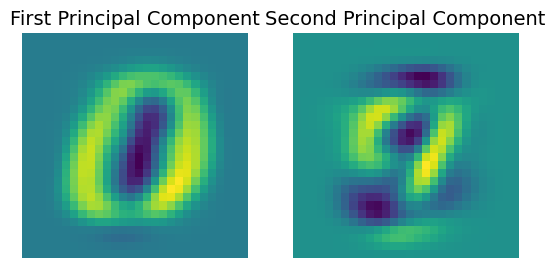

In [ ]:
image1 = pca.components_[0].reshape((28, 28))
image2 = pca.components_[1].reshape((28, 28))

#plotting it as an image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot image1 on the first subplot
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis
axes[0].set_title('First Principal Component')

# Plot image2 on the second subplot
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off axis
axes[1].set_title('Second Principal Component')

plt.savefig("principal components as image")

In [ ]:
# extra code – this cell generates and saves Figure 8–9

X_recovered = pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig("mnist_compression_plot")

NameError: name 'X_recovered' is not defined

<Figure size 700x400 with 0 Axes>